# CNN

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Firstly, let's select TensorFlow version 2.x in colab

In [2]:
# %tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.9.2'

In [3]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

Let's load MNIST dataset

In [4]:
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


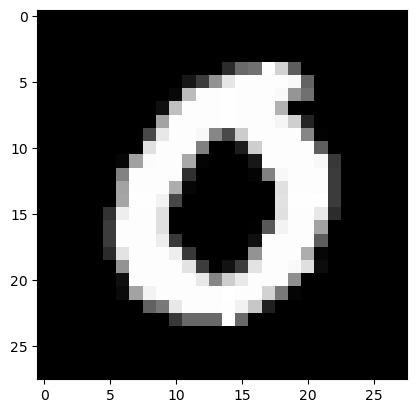

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

### Print shape of the data

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Reshape train and test sets into compatible shapes
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### Normalize data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [9]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())


X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [11]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense
from tensorflow.keras import Sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

2024-03-27 21:26:04.900585: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-27 21:26:04.900831: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [12]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=X_train, y=y_train, batch_size=32, epochs=1, validation_split = 0.3)

2024-03-27 21:26:08.880578: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-27 21:26:09.092322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.9588

2024-03-27 21:26:28.699373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 24s 16ms/step - loss: 0.1327 - accuracy: 0.9588 - val_loss: 0.0623 - val_accuracy: 0.9819


In [13]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=X_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)

Epoch 1/10
   5/1313 [..............................] - ETA: 16s - loss: 0.0446 - accuracy: 0.9812 

2024-03-27 21:26:33.485766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9864

2024-03-27 21:26:49.472999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 21s 15ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0576 - val_accuracy: 0.9834
Epoch 2/10
1313/1313 [==============================] - 20s 16ms/step - loss: 0.0221 - accuracy: 0.9925 - val_loss: 0.0597 - val_accuracy: 0.9832
Epoch 3/10
1313/1313 [==============================] - 20s 16ms/step - loss: 0.0144 - accuracy: 0.9950 - val_loss: 0.0615 - val_accuracy: 0.9844
Epoch 4/10
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0773 - val_accuracy: 0.9816
Epoch 5/10
1313/1313 [==============================] - 20s 16ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0697 - val_accuracy: 0.9863
Epoch 6/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0787 - val_accuracy: 0.9836
Epoch 7/10
1313/1313 [==============================] - 20s 16ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0705 - val_accura

### Final loss and accuracy

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0596 - accuracy: 0.9890


[0.0595535933971405, 0.9890000224113464]

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

## Vanilla CNN + Pooling + Dropout

### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- Use EarlyStopping
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [16]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=1, validation_data=(X_test, y_test), callbacks=[callback])

2024-03-27 21:30:50.812021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9604

2024-03-27 21:31:12.558448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 24s 13ms/step - loss: 0.1276 - accuracy: 0.9604 - val_loss: 0.0478 - val_accuracy: 0.9840


In [17]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
   1/1875 [..............................] - ETA: 8:12 - loss: 0.0365 - accuracy: 0.9688

2024-03-27 21:31:19.087249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.0449 - accuracy: 0.9860

2024-03-27 21:31:40.431573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 24s 13ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0382 - val_accuracy: 0.9873
Epoch 2/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0393 - val_accuracy: 0.9875


In [18]:
import os
os.getcwd()

'/Users/vidyadharbendre/nn_workspace/learn_neural_network_using_examples/jupyter_notebooks/CNN'

In [19]:
model.save_weights('check_point_folder/')

### Final loss and accuracy

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0393 - accuracy: 0.9875


[0.03930084407329559, 0.987500011920929]

Let's visualize results using matplotlib

2024-03-27 21:33:30.221816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 902ms/step
Predicted label: 6
Softmax Outputs: [[2.0413098e-09 4.8929376e-12 2.1054749e-15 2.3347574e-15 2.7133222e-09
  1.9030884e-08 1.0000000e+00 2.7102702e-13 1.1491493e-09 3.8056587e-14]]
1.0


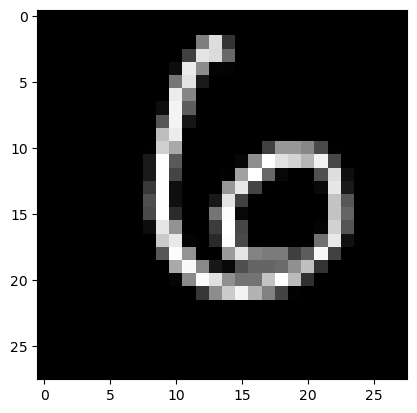

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[100].reshape(28, 28), cmap='gray')
y_pred = model.predict(X_test[100].reshape(1, 28, 28, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

In [22]:
!ls -la

total 2777552
drwxr-xr-x  30 vidyadharbendre  staff        960 Mar 27 21:32 .
drwxr-xr-x  42 vidyadharbendre  staff       1344 Mar 25 00:23 ..
-rw-r--r--@  1 vidyadharbendre  staff       6148 Mar 27 21:27 .DS_Store
drwxr-xr-x@ 17 vidyadharbendre  staff        544 Mar 27 21:24 .ipynb_checkpoints
-rw-rw-r--@  1 vidyadharbendre  staff      33661 Mar 23 12:45 1a. Classification_MNIST_CNN_Keras.ipynb
-rw-r--r--@  1 vidyadharbendre  staff      80103 Mar 23 13:07 1b. Classification_MNIST_CNN_Keras_Functional.ipynb
-rw-------@  1 vidyadharbendre  staff      60838 Mar 27 20:25 1c. Fraud Detection_NN-Notebook.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff    1269188 Mar 22 21:07 2a. Visualize an Image.ipynb
-rw-------@  1 vidyadharbendre  staff      54372 Mar 23 11:07 2b. Image_Classification_CNN.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff      39149 Mar 23 10:15 2c. Image Classification - Flowers.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff    3803839 Mar 23 11:26 3a. Image Augmentation.ipynb
-rw-r

## Transfer Learning

In [23]:
# Download h5 file from the below given link

https://www.kaggle.com/datasets/sasha18/street-view-house-nos-h5-file?resource=download

## The Street View House Numbers (SVHN) Dataset

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data preprocessing and formatting. It can be seen as similar in flavor to MNIST (e.g., the images are of small cropped digits), but incorporates an order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

- 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 0.
- 73257 digits for training, 26032 digits for testing, and 531131 additional, somewhat less difficult samples, to use as extra training data
- Comes in two formats:
  1. Original images with character level bounding boxes.
  2. MNIST-like 32-by-32 images centered around a single character (many of the images do contain some distractors at the sides).

- The dataset that we will be using in this notebook contains 42000 training samples and 18000 testing samples

#### load the dataset now

In [24]:
import h5py

# Open the file as readonly
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
# Close this file
h5f.close()

### Print the shape of training and testing data

In [25]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


### Let's check out the dataset

7 2 9 0 9 1 8 4 4 8 
9 1 4 3 5 8 6 5 5 0 
6 5 8 3 2 0 1 9 5 2 
8 9 1 0 9 5 3 3 7 6 
4 2 4 9 6 7 8 8 3 5 
3 7 1 4 8 1 4 2 9 0 
1 5 9 9 2 2 2 4 8 9 
8 3 8 4 5 2 8 6 4 5 
4 2 8 2 4 0 9 9 6 3 
2 7 5 0 7 6 9 8 7 2 


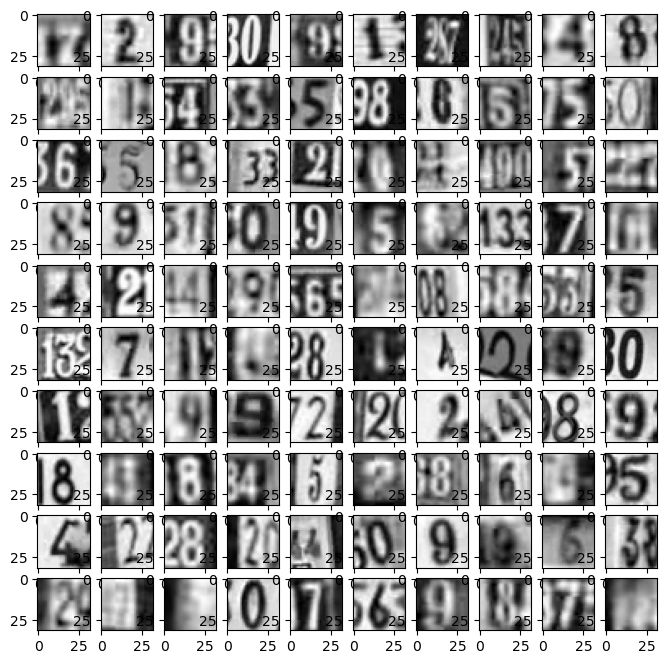

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

columns = 10
rows = 10

fig=plt.figure(figsize=(8, 8))

for i in range(1, columns*rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    print (y_test[i], end=' ')
    if i % columns == 0:
      print ("")
    plt.imshow(img, cmap='gray')

plt.show()

### Resize all the train and test inputs to 28X28, to match with MNIST CNN model's input size

In [27]:
X_train.shape

(42000, 32, 32)

In [28]:
# Importing OpenCV module for the resizing function
import cv2
import numpy as np

# Create a resized dataset for training and testing inputs with corresponding size
# Here we are resizing it to 28X28 (same input size as MNIST)
X_train_resized = np.zeros((X_train.shape[0], 28, 28))
for i in range(X_train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  X_train_resized[i,:,:] = cv2.resize(X_train[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

X_test_resized = np.zeros((X_test.shape[0], 28, 28))
for i in range(X_test.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  X_test_resized[i,:,:] = cv2.resize(X_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
  
# We don't need the original dataset anynmore so we can clear up memory consumed by original dataset
del(X_train, X_test)

### Reshape train and test sets into compatible shapes
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [29]:
X_train = X_train_resized.reshape(X_train_resized.shape[0], 28, 28, 1)
X_test = X_test_resized.reshape(X_test_resized.shape[0], 28, 28, 1)

We can delete X_train_resized and X_test_resized variables as we are going to use X_train and X_test variables going further

In [30]:
del(X_train_resized, X_test_resized)

### Normalize data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [31]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [32]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (42000, 28, 28, 1)
Images in X_train: 42000
Images in X_test: 18000


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [33]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Let's see one example after one-hot encoding

Label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


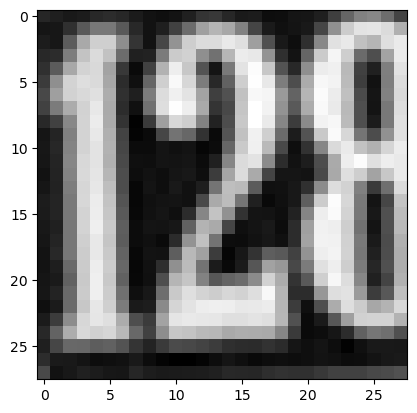

In [34]:
print("Label: ", y_train[0])
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))



### Load pre-trained weights from MNIST CNN model
- load the file named `cnn_mnist_weights.h5`

In [36]:
model.load_weights('check_point_folder/')

In [37]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [38]:
model.evaluate(X_test, y_test)

 12/563 [..............................] - ETA: 5s - loss: 2.6435 - accuracy: 0.1927

2024-03-27 21:34:55.820479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


563/563 [==============================] - 5s 9ms/step - loss: 2.6199 - accuracy: 0.2266


[2.619929075241089, 0.22661110758781433]

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                      

### Make only dense layers trainable
- freeze the initial convolutional layer weights and train only the dense (FC) layers
- set trainalble = False for all layers other than Dense layers

In [40]:
for layers in model.layers:
    if('dense' not in layers.name):
        layers.trainable = False
    if('dense' in layers.name):
        print(layers.name + ' is trained')

dense_4 is trained
dense_5 is trained


### Training the CNN 

Fit the model to the SVHN dataset
- Use early stopping
- fit the model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [41]:
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=1, validation_data=(X_test, y_test), callbacks=[callback])

   1/1313 [..............................] - ETA: 7:24 - loss: 2.6125 - accuracy: 0.2500

2024-03-27 21:35:27.350280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 21s 16ms/step - loss: 0.6128 - accuracy: 0.8163 - val_loss: 0.4279 - val_accuracy: 0.8777


In [42]:
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
1313/1313 [==============================] - 22s 16ms/step - loss: 0.3668 - accuracy: 0.8925 - val_loss: 0.3816 - val_accuracy: 0.8921
Epoch 2/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2882 - accuracy: 0.9135 - val_loss: 0.3619 - val_accuracy: 0.8976
Epoch 3/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2298 - accuracy: 0.9301 - val_loss: 0.3573 - val_accuracy: 0.9012


### Final loss and accuracy

In [43]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 5s 9ms/step - loss: 0.3573 - accuracy: 0.9012


[0.35728979110717773, 0.9011666774749756]

### Visualizing some predictions

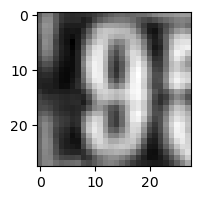

1/1 [==============================] - 0s 52ms/step
Preiction for above image:  9


2024-03-27 21:38:28.967921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


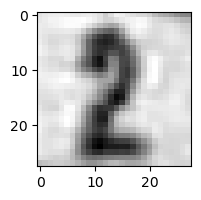

1/1 [==============================] - 0s 9ms/step
Preiction for above image:  2


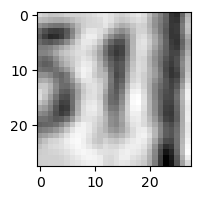

1/1 [==============================] - 0s 9ms/step
Preiction for above image:  1


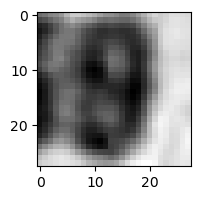

1/1 [==============================] - 0s 9ms/step
Preiction for above image:  9


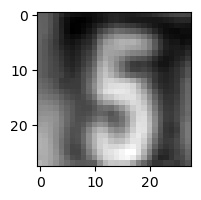

1/1 [==============================] - 0s 9ms/step
Preiction for above image:  5


In [44]:
import numpy as np
plt.figure(figsize=(2,2))
plt.imshow(X_test[3].reshape(28,28),cmap="gray")
plt.show()
print("Preiction for above image: ", np.argmax(model.predict(X_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[2].reshape(28,28),cmap="gray")
plt.show()
print("Preiction for above image: ", np.argmax(model.predict(X_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[33].reshape(28,28),cmap="gray")
plt.show()
print("Preiction for above image: ", np.argmax(model.predict(X_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[59].reshape(28,28),cmap="gray")
plt.show()
print("Preiction for above image: ", np.argmax(model.predict(X_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[36].reshape(28,28),cmap="gray")
plt.show()
print("Preiction for above image: ", np.argmax(model.predict(X_test[36].reshape(1,28,28,1))))

### Saving the CNN
Save the trained weights and model in h5 files

In [45]:
os.getcwd()

'/Users/vidyadharbendre/nn_workspace/learn_neural_network_using_examples/jupyter_notebooks/CNN'

In [46]:
#Set the path where you want to store the model and weights 
model.save('cnn_svhn.h5')
model.save_weights('cnn_svhn_weights.h5')